In [1]:
!pip install --upgrade multion -q

In [1]:
import multion


In [2]:
multion.login()

Already logged in.


In [3]:
response = multion.new_session({"input": "what is the weather today","url": "https://www.google.com"})
print(response['message'])
tabId = response['tabId']
tabId

running new session
I am typing "weather today" into the Google search bar and then submitting the search to find the current weather.




'1371682648'

In [4]:
response = multion.update_session(tabId, {"input": "what is the weather today","url": "https://www.google.com"})
response['message']

session updated


'The weather today in Barron Park, Palo Alto is clear with periodic clouds. The temperature is 28°C, precipitation is 10%, humidity is 76%, and wind speed is 5 km/h.\n\n'

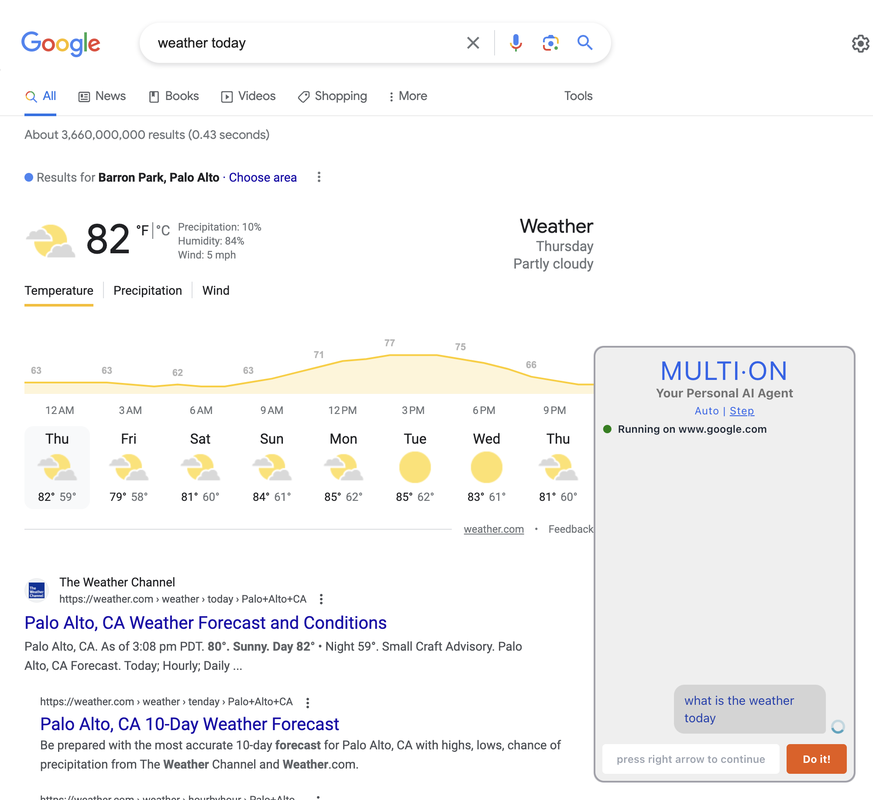

In [ ]:
multion.get_screenshot(response, height=800)